<a href="https://colab.research.google.com/github/Pranali-25/Capstone-Project/blob/main/2_Convolutional_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CONVOLUTIONAL NEURAL NETWORK (CNNs)**

What is Convolutional Neural Network (CNNs) ?

A Convolutional Neural Network (CNN) is a type of Deep Learning neural network architecture commonly used in Computer Vision. Computer vision is a field of Artificial Intelligence that enables a computer to understand and interpret the image or visual data.

Convolutional Neural Network (CNN) is the extended version of artificial neural networks (ANN) which is predominantly used to extract the feature from the grid-like matrix dataset. For example visual datasets like images or videos where data patterns play an extensive role.

# **1.Importing the libraries**
First, we'll import the necessary tensorflow and other libraries.

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# **2.Loading the dataset**
Loading the MNIST dataset.

In [ ]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


# **3.Preprocessing the Data**
Preprocess the MNIST dataset.

In [ ]:
# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images, test_images = train_images / 255.0, test_images / 255.0

# **4.Building the CNN model**
Building the CNN model for further process and also adding the dense layer on top.

In [ ]:
# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# **5.Training the model**
Train the model on the training data.

In [ ]:
# Train the model
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))


Epoch 1/5
1875/1875 [==============================] - 64s 33ms/step - loss: 0.1558 - accuracy: 0.9518 - val_loss: 0.0461 - val_accuracy: 0.9854
Epoch 2/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0491 - accuracy: 0.9847 - val_loss: 0.0334 - val_accuracy: 0.9887
Epoch 3/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0347 - accuracy: 0.9891 - val_loss: 0.0312 - val_accuracy: 0.9901
Epoch 4/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0265 - accuracy: 0.9912 - val_loss: 0.0350 - val_accuracy: 0.9892
Epoch 5/5
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0205 - accuracy: 0.9934 - val_loss: 0.0338 - val_accuracy: 0.9894


# **6.Evaluating the model**
Evaluate the model on the test data.

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc}")


313/313 - 2s - loss: 0.0338 - accuracy: 0.9894 - 2s/epoch - 8ms/step

Test accuracy: 0.9894000291824341


# **7.Visualizing the Output**
Visualizing the output by creating an actiivation model.

1/1 [==============================] - 0s 128ms/step


<ipython-input-9-634093af27e2>:23: RuntimeWarning: invalid value encountered in divide
  channel_image /= channel_image.std()
<ipython-input-9-634093af27e2>:26: RuntimeWarning: invalid value encountered in cast
  channel_image = np.clip(channel_image, 0, 255).astype('uint8')


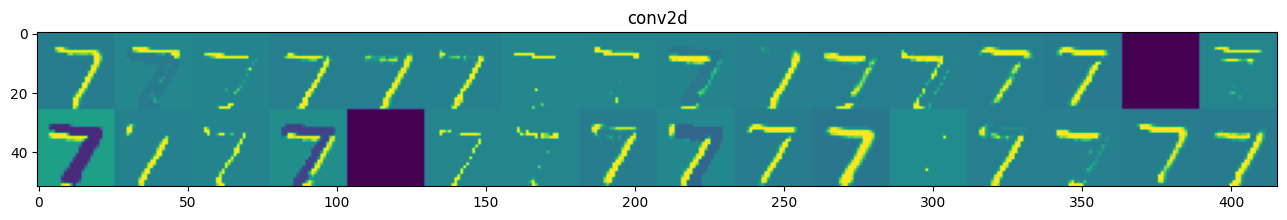

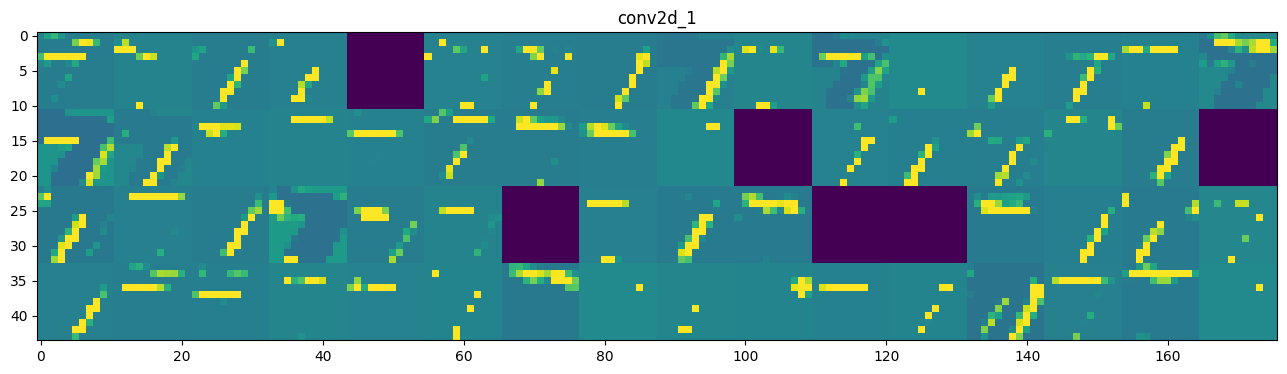

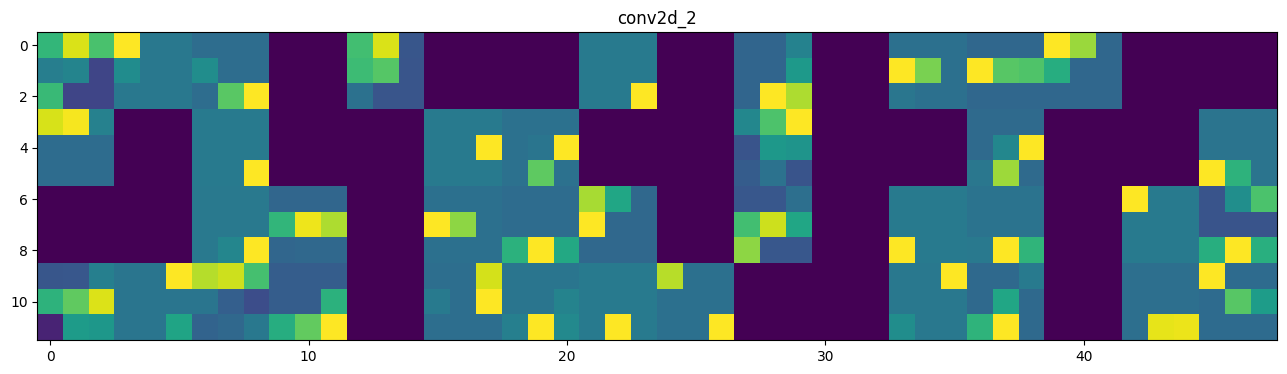

In [ ]:
# Function to visualize the output of the conv layers
def visualize_conv_layers(model, image):
    layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
    activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

    activations = activation_model.predict(image)

    layer_names = [layer.name for layer in model.layers if 'conv' in layer.name]

    images_per_row = 16

    for layer_name, layer_activation in zip(layer_names, activations):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]

        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))

        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0, :, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image

        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

# Visualize the output for a sample image
sample_image = np.expand_dims(test_images[0], axis=0)
visualize_conv_layers(model, sample_image)

# **CONCLUSION**
 We have succesfully learnt and tried to visualize a Convolutional Neural Network (CNN) using TensorFlow and Keras on the MNIST dataset of handwritten digits.